In [2]:
# Install libraries
!pip install pandas-profiling sweetviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=21049bd855da98c8d0e7ac80ac028710aa59b9ed583ed5540370a4c0a613f1e0
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-

In [3]:
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

Saving cleaned_bangalore_housing.csv to cleaned_bangalore_housing.csv


In [4]:
print(" Data Preview ")
display(df.head())
print("\n Dataset Shape ")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n Data Types")
print(df.dtypes)
print("\n Missing Values")
print(df.isnull().sum())

 Data Preview 


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,super built-up area,19-dec,electronic city phase ii,2 bhk,coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,plot area,ready to move,chikka tirupathi,4 bedroom,theanmp,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,built-up area,ready to move,uttarahalli,3 bhk,no society,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,super built-up area,ready to move,lingadheeranahalli,3 bhk,soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,super built-up area,ready to move,kothanur,2 bhk,no society,1200.0,2.0,1.0,51.00,2.0,4250.000000



 Dataset Shape 
Rows: 12431, Columns: 11

 Data Types
area_type          object
availability       object
location           object
size               object
society            object
total_sqft        float64
bath              float64
balcony           float64
price             float64
bhk               float64
price_per_sqft    float64
dtype: object

 Missing Values
area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath              0
balcony           0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [5]:
def convert_sqft(x):
    if isinstance(x, str):
        if '-' in x:
            return (float(x.split('-')[0]) + float(x.split('-')[1]))/2
        elif 'Sq. Meter' in x:
            return float(x.split('Sq. Meter')[0]) * 10.764
    return float(x)

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

In [6]:
df['bhk'] = df['size'].str.extract('(\d+)').astype(float)

#  outliers
price_upper_limit = df['price'].quantile(0.99)
df = df[df['price'] <= price_upper_limit]

In [7]:
print("\n Categorical Features Summary ")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())



 Categorical Features Summary 

area_type:
area_type
super built-up  area    8662
built-up  area          2311
plot  area              1254
carpet  area              81
Name: count, dtype: int64

availability:
availability
ready to move    9652
18-dec            304
18-may            285
18-apr            255
18-aug            199
Name: count, dtype: int64

location:
location
whitefield         528
sarjapur  road     387
electronic city    294
kanakpura road     269
thanisandra        235
Name: count, dtype: int64

size:
size
2 bhk        5176
3 bhk        4274
4 bedroom     594
4 bhk         541
1 bhk         527
Name: count, dtype: int64

society:
society
no society    4623
grrvagr         80
prarepa         76
sryalan         59
prtates         58
Name: count, dtype: int64


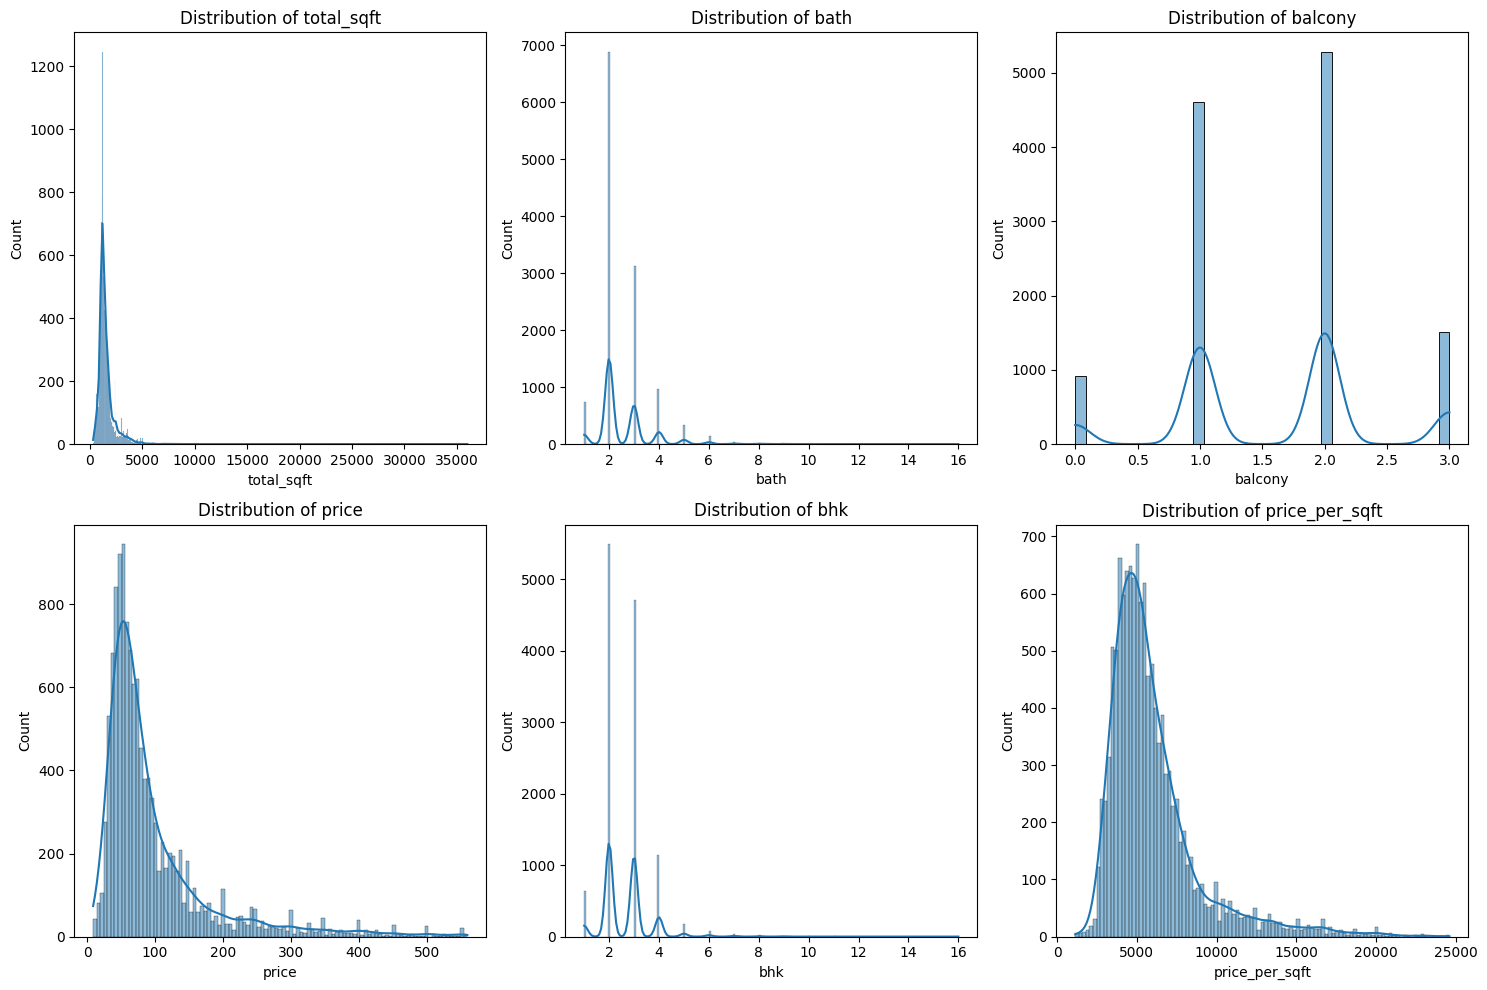

In [8]:
plt.figure(figsize=(15,10))

# Numerical
num_cols = ['total_sqft', 'bath', 'balcony', 'price', 'bhk', 'price_per_sqft']
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


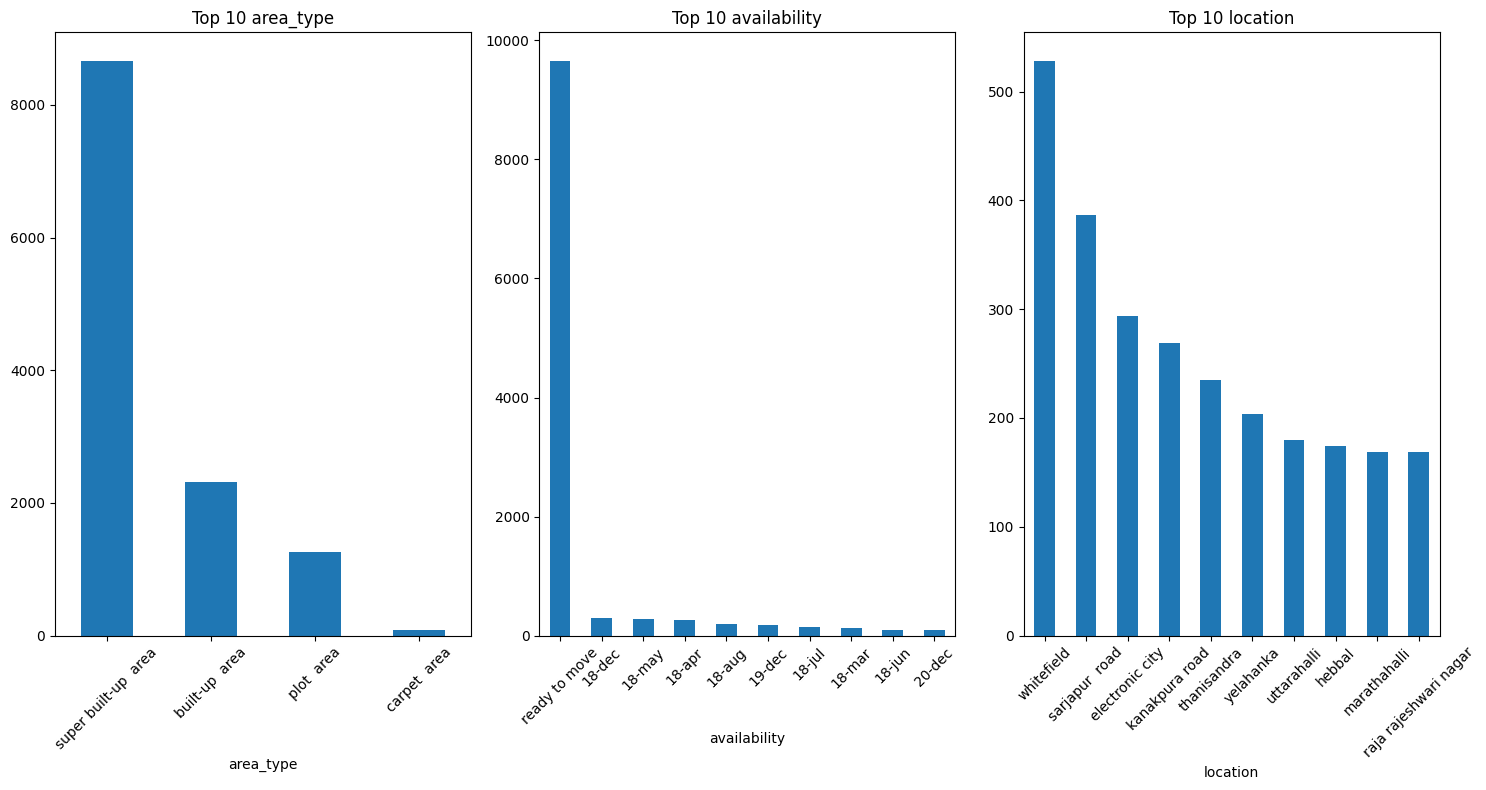

In [9]:
# Categorical
plt.figure(figsize=(15,8))
for i, col in enumerate(['area_type', 'availability', 'location'], 1):
    plt.subplot(1,3,i)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

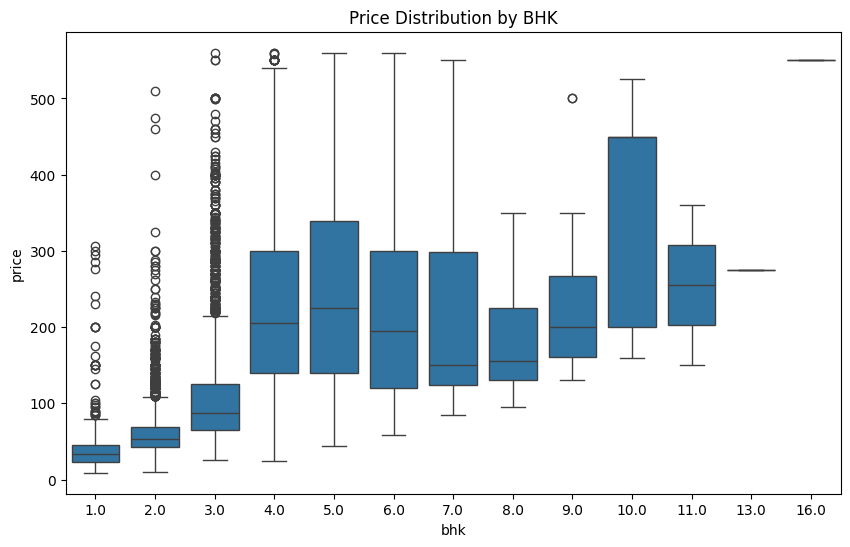

In [10]:
# Price vs BHK
plt.figure(figsize=(10,6))
sns.boxplot(x='bhk', y='price', data=df)
plt.title('Price Distribution by BHK')
plt.show()


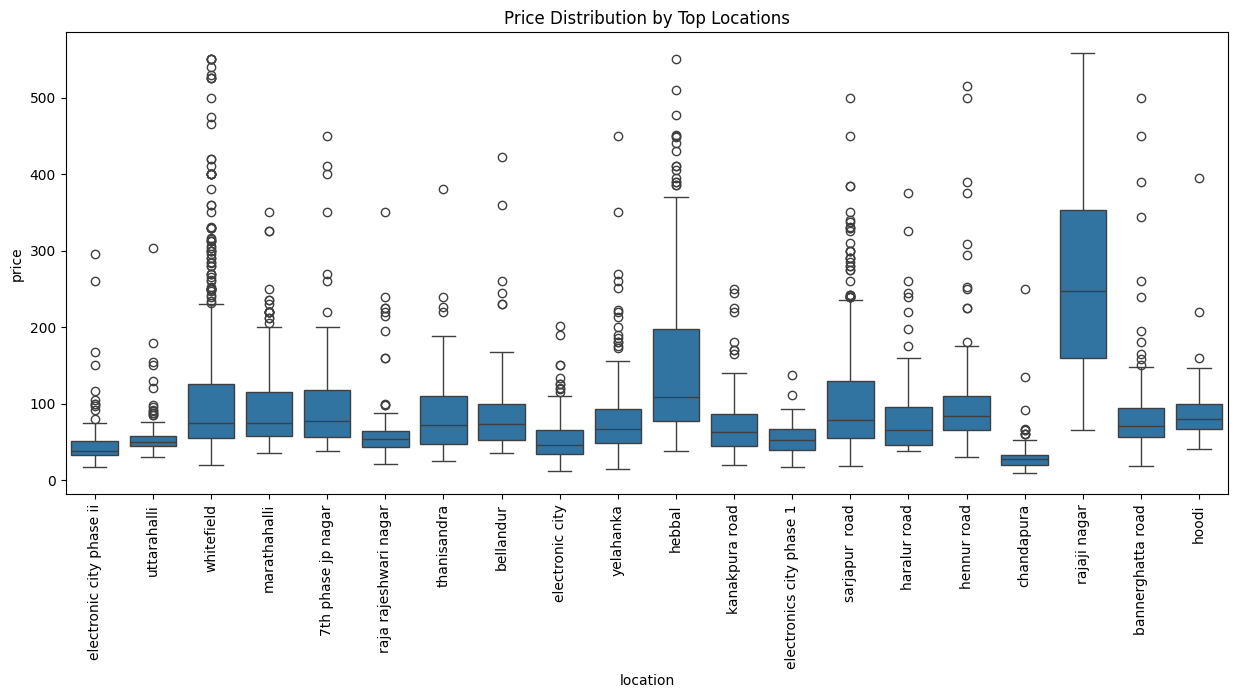

In [11]:
# Location vs Price (top 20 locations)
top_locations = df['location'].value_counts().head(20).index
plt.figure(figsize=(15,6))
sns.boxplot(x='location', y='price',
           data=df[df['location'].isin(top_locations)])
plt.xticks(rotation=90)
plt.title('Price Distribution by Top Locations')
plt.show()


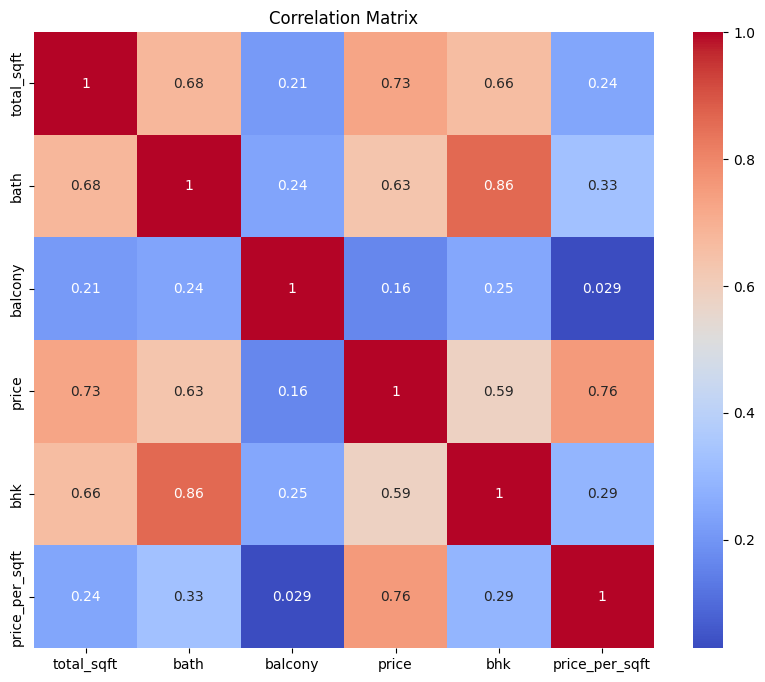

In [12]:
# Correlation Analysis
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
print("\n Key Insights")
print(f"1. Most common property type: {df['area_type'].mode()[0]}")
print(f"2. Average price per sqft: ₹{df['price_per_sqft'].mean():.2f}")
print(f"3. Price-BHK correlation: {df[['price','bhk']].corr().iloc[0,1]:.2f}")
print(f"4. Most expensive location: {df.groupby('location')['price_per_sqft'].mean().idxmax()}")
print(f"5. Bathrooms per BHK ratio: {(df['bath']/df['bhk']).mean():.2f}")



 Key Insights
1. Most common property type: super built-up  area
2. Average price per sqft: ₹6007.41
3. Price-BHK correlation: 0.59
4. Most expensive location: sbm colony
5. Bathrooms per BHK ratio: 0.97
